In [14]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
df = pd.read_excel('ASIANPAINT_Dataset.xlsx')
df["T"] = df["t"] / 365.0
df.head()

,Date,Expiry,t,strike_price,underlying_value,sigma,r,close,T
0,2020-01-01,2020-01-30,29,1980,1793.2,0.008151,0.0494,3.8,0.079452
1,2020-01-01,2020-01-30,29,1440,1793.2,0.008151,0.0494,398.5,0.079452
2,2020-01-01,2020-01-30,29,2020,1793.2,0.008151,0.0494,1.2,0.079452
3,2020-01-01,2020-01-30,29,1920,1793.2,0.008151,0.0494,6.5,0.079452
4,2020-01-01,2020-01-30,29,1940,1793.2,0.008151,0.0494,5.0,0.079452


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35591 entries, 0 to 35590
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              35591 non-null  datetime64[ns]
 1   Expiry            35591 non-null  datetime64[ns]
 2   t                 35591 non-null  int64         
 3   strike_price      35591 non-null  int64         
 4   underlying_value  35591 non-null  float64       
 5   sigma             35591 non-null  float64       
 6   r                 35591 non-null  float64       
 7   close             35591 non-null  float64       
 8   T                 35591 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(2)
memory usage: 2.4 MB


In [19]:
#hyperparameters
n_units = 400
n_layers = 4          
batch_size = 4096
epochs = 30

In [18]:
X = df[[
    "underlying_value", 
    "strike_price", 
    "T", 
    "r", 
    "sigma"
]]

y = df["close"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test  = X_scaler.transform(X_test)
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled  = y_scaler.transform(y_test.values.reshape(-1,1))

In [48]:
model = Sequential()

model.add(Dense(400, input_shape=(X_train.shape[1],)))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())

for _ in range(3):
    model.add(Dense(400))
    model.add(LeakyReLU(alpha=0.01))
    model.add(BatchNormalization())

model.add(Dense(1, activation="relu"))

C:\Users\rodes\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\rodes\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 400)                 │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 400)                 │           1,600 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 400)                 │           1,600 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 400)                 │           1,600 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 400)                 │           1,600 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             401 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 490,401 (1.87 MB)

 Trainable params: 487,201 (1.86 MB)

 Non-trainable params: 3,200 (12.50 KB)

In [37]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [38]:
def lr_schedule(epoch):
    if epoch < 10:
        return 1e-3
    elif epoch < 20:
        return 1e-4
    else:
        return 1e-5

In [50]:
model.compile(
    optimizer=Adam(),
    loss="mse",
    metrics=["mse"]
)

In [67]:
history = model.fit(
    X_train,
     y_train_scaled,
    validation_split=0.1,
    epochs=30,          
    batch_size=4096,    
    callbacks=[LearningRateScheduler(lr_schedule)],
    verbose=1
)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 308ms/step - loss: 0.3938 - mse: 0.3938 - val_loss: 0.5005 - val_mse: 0.5005 - learning_rate: 0.0010
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 284ms/step - loss: 0.3987 - mse: 0.3987 - val_loss: 0.4880 - val_mse: 0.4880 - learning_rate: 0.0010
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 304ms/step - loss: 0.3982 - mse: 0.3982 - val_loss: 0.4929 - val_mse: 0.4929 - learning_rate: 0.0010
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - loss: 0.3946 - mse: 0.3946 - val_loss: 0.4860 - val_mse: 0.4860 - learning_rate: 0.0010
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step - loss: 0.3903 - mse: 0.3903 - val_loss: 0.4703 - val_mse: 0.4703 - learning_rate: 0.0010
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - loss: 0.3930 - mse: 0.3930 - val_loss: 0.4671 - val_mse: 0.4671 - learning_rate: 0.0010
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step - loss: 0.3939 - mse: 0.3939 - val_loss: 0.4487 - val_mse: 0.4487 - learning_rate: 0.0010
Epoch 8/30
7/7 ━━━━━

In [68]:
train_mse_scaled = model.evaluate(X_train, y_train_scaled, verbose=0)[0]
test_mse_scaled  = model.evaluate(X_test, y_test_scaled, verbose=0)[0]

print("Scaled Train MSE:", train_mse_scaled)
print("Scaled Test MSE :", test_mse_scaled)

Scaled Train MSE: 0.39863768219947815
Scaled Test MSE : 0.4024656116962433


In [69]:
y_pred_test_scaled = model.predict(X_test)
y_pred_test = y_scaler.inverse_transform(y_pred_test_scaled)

from sklearn.metrics import mean_squared_error
real_test_mse = mean_squared_error(y_test, y_pred_test)

print("Real Test MSE:", real_test_mse)

223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Real Test MSE: 12484.02445813791


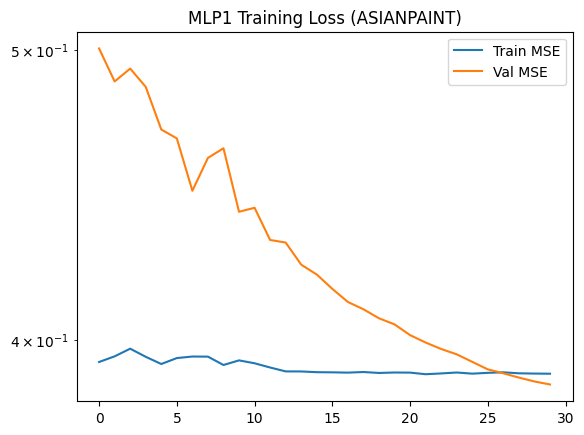

In [70]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train MSE")
plt.plot(history.history["val_loss"], label="Val MSE")
plt.yscale("log")
plt.legend()
plt.title("MLP1 Training Loss (ASIANPAINT)")
plt.show()

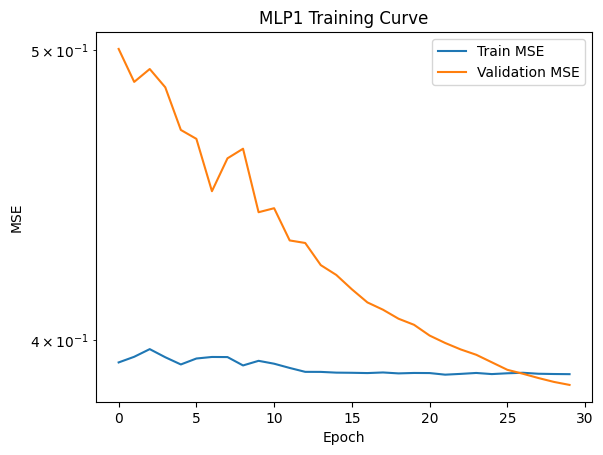

In [71]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train MSE")
plt.plot(history.history["val_loss"], label="Validation MSE")
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.title("MLP1 Training Curve")
plt.show()